In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, plot_confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('../data/cleaned_engineered_five_states.csv')

In [65]:
df['covid_severity'] = 0
mask1 = df['cases_per_100_people'] < 2
mask2 = (df['cases_per_100_people'] >= 2) & (df['cases_per_100_people'] < 3)
mask3 = df['cases_per_100_people'] >= 3
df['covid_severity'][mask1] = 1
df['covid_severity'][mask2] = 2
df['covid_severity'][mask3] = 3
df['covid_severity'].value_counts()

1    228
3    158
2    157
Name: covid_severity, dtype: int64

In [66]:
228/(228+158+157)

0.4198895027624309

In [68]:
df.fillna(0, inplace=True)

In [70]:
list(df.columns)

['county_state',
 'total_cases',
 'total_fatalities',
 'death_rate',
 'total_tests',
 'race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'obes_percent',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'healt

In [168]:
X = df[['race_pop',
 'race_pop_hispanic_or_latino_of_any_race',
 'race_pop_white_alone',
 'race_pop_black_or_african_american_alone',
 'race_pop_american_indian_and_alaska_native_alone',
 'race_pop_asian_alone',
 'race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'race_pop_some_other_race_alone',
 'race_pop_two_or_more_races',
 'sex_age_pop',
 'sex_age_pop_male',
 'sex_age_pop_female',
 'sex_age_pop_under_5',
 'sex_age_pop_5_to_9',
 'sex_age_pop_10_to_14',
 'sex_age_pop_15_to_19',
 'sex_age_pop_20_to_24',
 'sex_age_pop_25_to_34',
 'sex_age_pop_35_to_44',
 'sex_age_pop_45_to_54',
 'sex_age_pop_55_to_59',
 'sex_age_pop_60_to_64',
 'sex_age_pop_65_to_74',
 'sex_age_pop_75_to_84',
 'sex_age_pop_85_and_over',
 'sex_age_median_age_in_years',
 'sq_mi',
 'obes_percent',
 'health_ins_noninst_pop',
 'health_ins_noninst_pop_cov_yes',
 'health_ins_noninst_pop_private',
 'health_ins_noninst_pop_public',
 'health_ins_noninst_pop_cov_no',
 'inc_hhlds',
 'inc_hhlds_less_than_10_000',
 'inc_hhlds_10_000_to_14_999',
 'inc_hhlds_15_000_to_24_999',
 'inc_hhlds_25_000_to_34_999',
 'inc_hhlds_35_000_to_49_999',
 'inc_hhlds_50_000_to_74_999',
 'inc_hhlds_75_000_to_99_999',
 'inc_hhlds_100_000_to_149_999',
 'inc_hhlds_150_000_to_199_999',
 'inc_hhlds_200_000_or_more',
 'inc_med_hhld_inc_dol',
 'inc_mean_hhld_inc_dol',
 'inc_per_capita_inc_dol',
 'inc_med_earn_male_full_yr_workers_dol',
 'inc_med_earn_female_full_yr_workers_dol',
 'tests_per_100_people',
 'pop_density',
 'inc_hhlds_less_than_25_000',
 'inc_hhlds_25_000_to_49_999',
 'inc_hhlds_less_than_99_999',
 'inc_hhlds_100_000_or_more',
 'inc_hhlds_less_than_49_999',
 'inc_hhlds_50_000_to_99_999',
 'race_pop_other',
 'race_pop_minority',
 'sex_age_pop_0_to_44',
 'sex_age_pop_45_to_74',
 'sex_age_pop_75_and_over',
 'sex_age_pop_0_to_64',
 'sex_age_pop_65_and_over',
 'sex_age_pop_0_to_35',
 'sex_age_pop_35_to_59',
 'sex_age_pop_60_to_84',
 'percent_race_pop_hispanic_or_latino_of_any_race',
 'percent_race_pop_white_alone',
 'percent_race_pop_black_or_african_american_alone',
 'percent_race_pop_american_indian_and_alaska_native_alone',
 'percent_race_pop_asian_alone',
 'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
 'percent_race_pop_some_other_race_alone',
 'percent_race_pop_two_or_more_races',
 'percent_sex_age_pop_male',
 'percent_sex_age_pop_female',
 'percent_sex_age_pop_under_5',
 'percent_sex_age_pop_5_to_9',
 'percent_sex_age_pop_10_to_14',
 'percent_sex_age_pop_15_to_19',
 'percent_sex_age_pop_20_to_24',
 'percent_sex_age_pop_25_to_34',
 'percent_sex_age_pop_35_to_44',
 'percent_sex_age_pop_45_to_54',
 'percent_sex_age_pop_55_to_59',
 'percent_sex_age_pop_60_to_64',
 'percent_sex_age_pop_65_to_74',
 'percent_sex_age_pop_75_to_84',
 'percent_sex_age_pop_85_and_over',
 'percent_health_ins_noninst_pop_cov_yes',
 'percent_health_ins_noninst_pop_cov_no',
 'percent_inc_hhlds_less_than_10_000',
 'percent_inc_hhlds_10_000_to_14_999',
 'percent_inc_hhlds_15_000_to_24_999',
 'percent_inc_hhlds_25_000_to_34_999',
 'percent_inc_hhlds_35_000_to_49_999',
 'percent_inc_hhlds_50_000_to_74_999',
 'percent_inc_hhlds_75_000_to_99_999',
 'percent_inc_hhlds_100_000_to_149_999',
 'percent_inc_hhlds_150_000_to_199_999',
 'percent_inc_hhlds_200_000_or_more',
 'percent_inc_hhlds_less_than_25_000',
 'percent_inc_hhlds_25_000_to_49_999',
 'percent_inc_hhlds_less_than_99_999',
 'percent_inc_hhlds_100_000_or_more',
 'percent_inc_hhlds_less_than_49_999',
 'percent_inc_hhlds_50_000_to_99_999',
 'percent_race_pop_other',
 'percent_race_pop_minority',
 'percent_sex_age_pop_0_to_44',
 'percent_sex_age_pop_45_to_74',
 'percent_sex_age_pop_75_and_over',
 'percent_sex_age_pop_0_to_64',
 'percent_sex_age_pop_65_and_over',
 'percent_sex_age_pop_0_to_35',
 'percent_sex_age_pop_35_to_59',
 'percent_sex_age_pop_60_to_84']]

y = df['covid_severity']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

In [170]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [100]:
classification_models = [
    ['Logistic Regression: ', LogisticRegression()],
    ['K Nearest Neighbour: ', KNeighborsClassifier()], 
    ['Decision Tree: ', DecisionTreeClassifier()], 
    ['Bagging Classifier: ', BaggingClassifier()],
    ['Random Forest Classifier: ', RandomForestClassifier()], 
    ['Ada Boost Classifier: ', AdaBoostClassifier()], 
    ['SUpport Vector Classifier: ', SVC()]
]

In [101]:
precision_score(y_test, y_test, average = 'weighted')

1.0

In [102]:
precision_scores = []
sensitivity_scores = [] 
accuracy_scores = []

for name, model in classification_models:
    
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    preds = model.predict(X_test_scaled)
    
    print(f'Train score for {name} is {train_score}')
    print(f'Test score for {name} is {test_score}')
    print('Precision Score', precision_score(y_test, preds, average = 'macro'))
    print('Recall Score', recall_score(y_test, preds, average = 'macro'))
    print('Accuracy score', accuracy_score(y_test, preds))
    
    precision_scores.append(precision_score(y_test, preds, average='macro'))
    sensitivity_scores.append(recall_score(y_test, preds, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, preds))

    print('\n')

Train score for Logistic Regression:  is 0.7469287469287469
Test score for Logistic Regression:  is 0.5735294117647058
Precision Score 0.551058201058201
Recall Score 0.5456927575348628
Accuracy score 0.5735294117647058


Train score for K Nearest Neighbour:  is 0.7199017199017199
Test score for K Nearest Neighbour:  is 0.5073529411764706
Precision Score 0.49158615136876005
Recall Score 0.4758771929824561
Accuracy score 0.5073529411764706


Train score for Decision Tree:  is 1.0
Test score for Decision Tree:  is 0.4632352941176471
Precision Score 0.4391064871481028
Recall Score 0.4449055330634278
Accuracy score 0.4632352941176471


Train score for Bagging Classifier:  is 0.972972972972973
Test score for Bagging Classifier:  is 0.5
Precision Score 0.4858938379319606
Recall Score 0.4696018893387314
Accuracy score 0.5


Train score for Random Forest Classifier:  is 1.0
Test score for Random Forest Classifier:  is 0.5441176470588235
Precision Score 0.4858793324775353
Recall Score 0.50362123

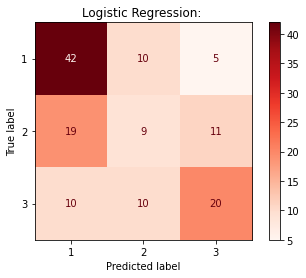

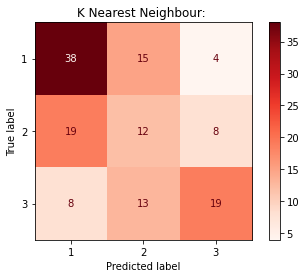

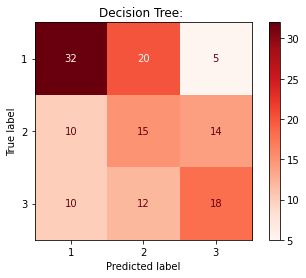

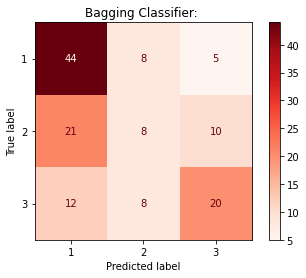

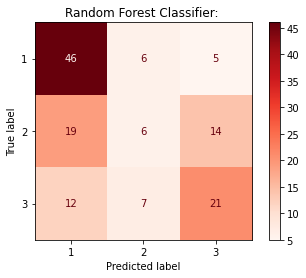

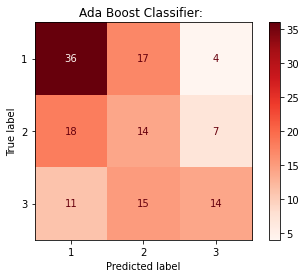

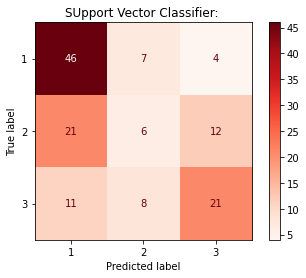

In [63]:
for name, model in classification_models:
        
    model.fit(X_train_scaled, y_train)
    
    plot_confusion_matrix(model, 
                          X_test_scaled,
                          y_test, 
                          display_labels=['1', '2', '3'], 
                          cmap=plt.cm.Reds )
    plt.title(f'{name}')

In [105]:
X.shape

(543, 118)

### Neural Network

In [205]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
y

0      1
1      1
2      2
3      1
4      1
      ..
538    1
539    3
540    2
541    2
542    3
Name: covid_severity, Length: 543, dtype: int64

In [164]:
y_train

136    1
207    1
275    1
362    2
533    3
      ..
431    3
292    1
52     3
488    2
372    3
Name: covid_severity, Length: 407, dtype: int64

In [171]:
y_train = to_categorical(y_train)
y_train = np.delete(y_train, 0, axis=1)
y_test = to_categorical(y_test)
y_test = np.delete(y_test, 0, axis=1)

In [225]:
model = Sequential()
model.add(Dense(64, input_shape = (X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(264, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [226]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=[['acc']]
)

In [227]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [228]:
history = model.fit(
    X_train_scaled, 
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=265,
    verbose=0, 
    callbacks=callback
)

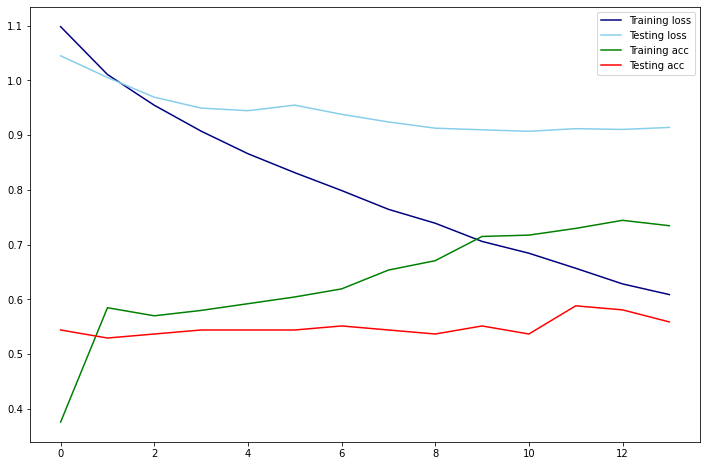

In [229]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

train_acc = history.history['acc']
test_acc = history.history['val_acc']



plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_acc, label='Training acc', color='green')
plt.plot(test_acc, label='Testing acc', color='red')
plt.legend();

In [224]:
history.history['val_acc']

[0.45588234066963196,
 0.47058823704719543,
 0.4852941036224365,
 0.5147058963775635,
 0.5220588445663452,
 0.5367646813392639,
 0.529411792755127,
 0.529411792755127,
 0.529411792755127,
 0.529411792755127,
 0.5367646813392639,
 0.5367646813392639,
 0.5661764740943909,
 0.5808823704719543]